In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [141]:
url_api = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01210PM/html/2022-10/2023-05/esp'

In [142]:
response  = requests.get(url_api)

In [143]:
contenido_html = response.text

In [144]:
soup = BeautifulSoup(contenido_html)

In [145]:
resultados = soup.find('div', class_="barra-resultados")

In [146]:
periodos = resultados.find_all('td', class_="periodo")

In [147]:
fechas = []
i = 1

In [148]:
for periodo in periodos:
    fechas.append({
        'orden': i,
        'Fecha': periodo.find('b').text
    })
    i += 1

In [149]:
tasas = resultados.find_all('td', class_="dato")

In [150]:
tcs = []
i = 1

In [151]:
for tasa in tasas:
    tcs.append({
        'orden': i,
        'TC': tasa.text.replace('\n', '').replace('\r', '').replace(' ', '')
    })
    i += 1

In [152]:
df1 = pd.DataFrame(fechas)
df2 = pd.DataFrame(tcs)
df_combinado = pd.merge(df1, df2, on='orden')
df_combinado['TC'] = df_combinado['TC'].astype(float)

In [153]:
df_combinado

,orden,Fecha,TC
0,1,Oct22,3.979
1,2,Nov22,3.877
2,3,Dic22,3.829
3,4,Ene23,3.833
4,5,Feb23,3.841
5,6,Mar23,3.780
6,7,Abr23,3.766


In [154]:
df_ordenado = df_combinado.sort_values(by='orden')

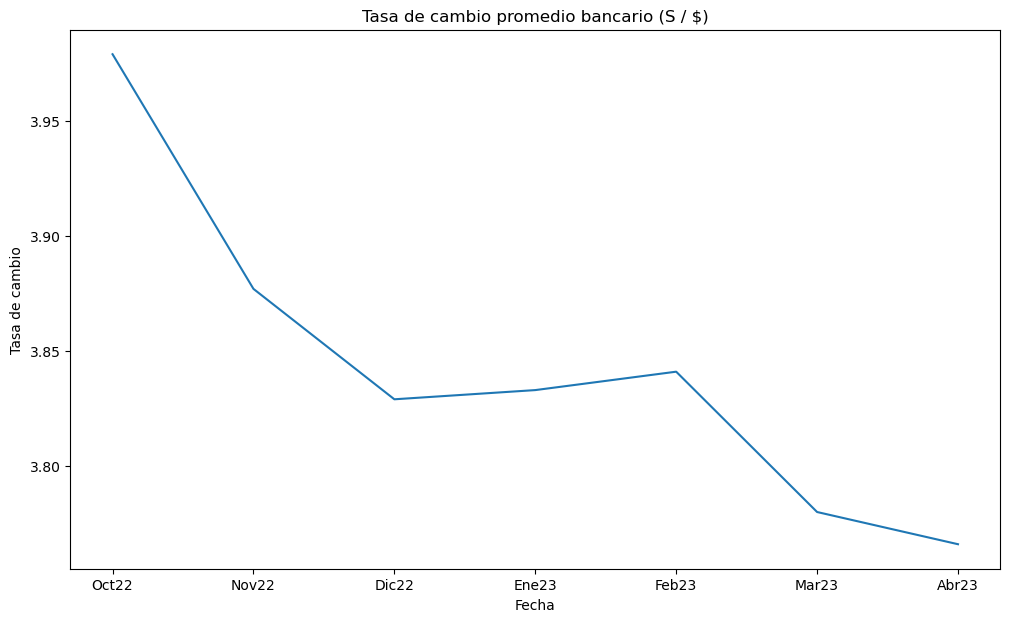

In [155]:
plt.figure(figsize=(12, 7))

plt.plot(df_combinado['Fecha'], df_combinado['TC'])

plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio')
plt.title('Tasa de cambio promedio bancario (S / $)')
plt.show()